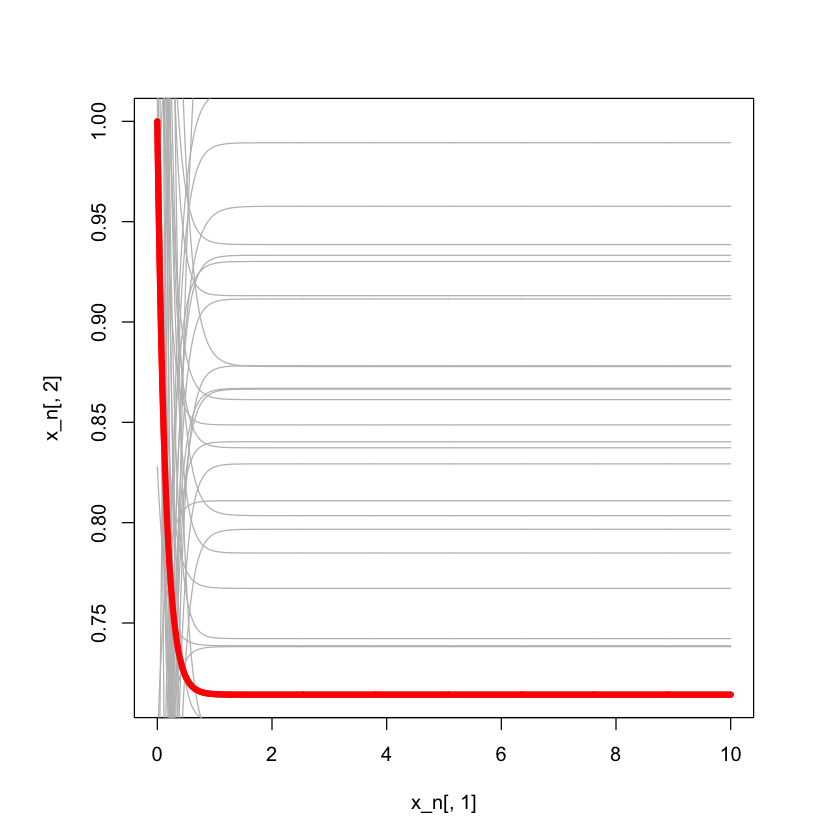

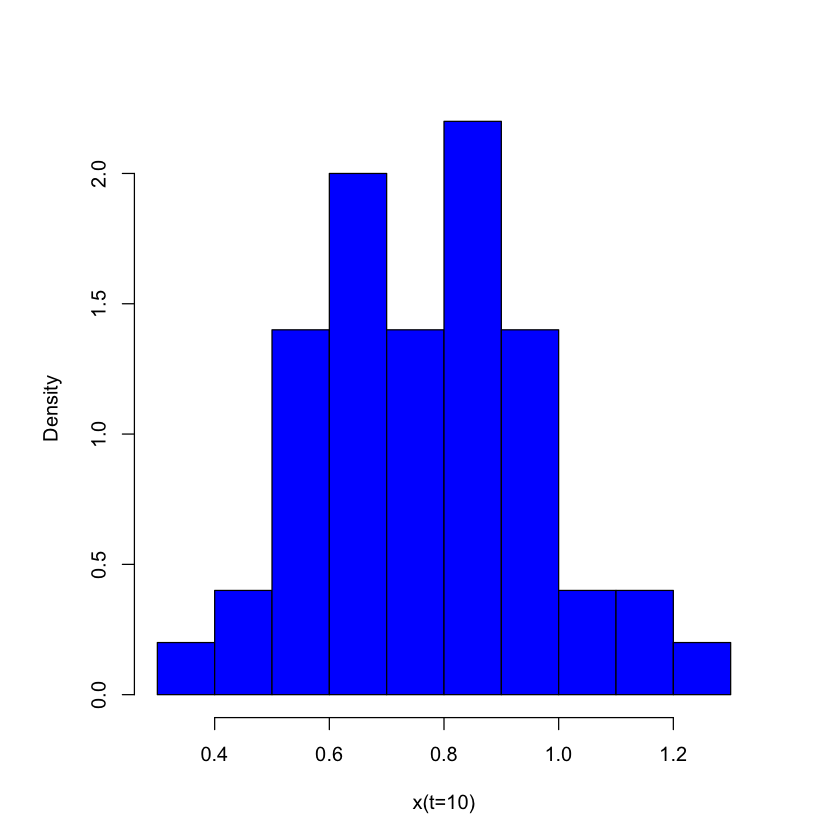

In [2]:
library(deSolve)

# Define la función extrayendo los parámetros del vector parms
cocos <- function(t, X, parms) {
  kP <- parms[1]
  kD <- parms[2]
  dX <- kP - X * kD
  list(dX) # Retorna la derivada de X con respecto al tiempo en una lista de un solo elemento (serán los datos nominales, también conocidos como datos categóricos o cualitativos nominales, se utilizan para clasificar o etiquetar elementos en categorías distintas, sin que estas categorías tengan un orden o jerarquía predefinida. 
}

# Valores nominales
kP_nominal <- 5
kD_nominal <- 7

# Condiciones iniciales
x0_nominal <- 1

# Intervalo de integración
tspan <- seq(from = 0, to = 10, by = 0.01)

# Parámetros y solución nominal
parms <- c(kP_nominal, kD_nominal)
x_n <- ode(y = x0_nominal, times = tspan, func = cocos, parms = parms)

par(pty = "s")
plot(x_n[,1], x_n[,2], col = "red", type = "l", lwd = 5)

# Número de iteraciones
iterations <- 50

# Prealoca la matriz para guardar los resultados
x_t_family <- matrix(data = NA, nrow = length(tspan), ncol = iterations)

for (i in 1:iterations) {
  # Muestra parámetros
  kP <- rnorm(1, mean = kP_nominal, sd = 1)
  kD <- rnorm(1, mean = kD_nominal, sd = 1)
  x0 <- rnorm(1, mean = x0_nominal, sd = 1)
  
  parms <- c(kP, kD)
  # Invoca al integrador 
  x <- ode(y = x0, times = tspan, func = cocos, parms = parms)
  x_t_family[, i] <- x[, 2]
  
  lines(x[,1], x[,2], col = "grey", type = "l", lwd = 1)
}

lines(x_n[,1], x_n[,2], col = "red", type = "l", lwd = 5, ylab = "cocos", xlab = "time")

# Graficar la distribución de valores finales
par(pty = "s")
hist(x_t_family[1001, ], freq = FALSE, col = "blue", main = " ", xlab = "x(t=10)")
points(kP_nominal / kD_nominal, 3)
